In [ ]:
import json
import csv

# Replace the list with the paths to your seven JSON files
json_file_paths = [
    '20230727_195941_issue_sharings.json',
    '20230803_094705_issue_sharings.json',
    '20230810_123938_issue_sharings.json',
    '20230817_130502_issue_sharings.json',
    '20230824_101836_issue_sharings.json',
    '20230831_061759_issue_sharings.json',
    '20230907_092956_issue_sharings.json',
    '20230914_080417_issue_sharings.json'
]

data_rows = []

for json_file_path in json_file_paths:
    # Read JSON file
    with open(json_file_path, 'r', encoding='utf-8') as json_file:
        json_data = json.load(json_file)

    # Extracting author and DateOfConversation from the JSON data
    for source in json_data.get("Sources", []):
        for sharing in source.get("ChatgptSharing", []):
            for conversation in sharing.get("Conversations", []):
                author = source.get("Author", "")
                coding_language = source.get("RepoLanguage", "")
                date_of_conversation = sharing.get("DateOfConversation", "")
                data_rows.append((author, date_of_conversation, coding_language))

# Writing author and DateOfConversation to CSV file
csv_file_path = "author_and_date.csv"
with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Author", "DateOfConversation","CodingLanguage"])  # Write header
    for row in data_rows:
        writer.writerow(row)

print(f"Author and DateOfConversation written to {csv_file_path}")

Author and DateOfConversation written to author_and_date.csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('author_and_date.csv')

# Remove duplicates based on all columns
df_no_duplicates = df.drop_duplicates()

# Save the DataFrame without duplicates to a new CSV file
df_no_duplicates.to_csv('author_and_data_no_duplicates.csv', index=False)

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('author_and_data_no_duplicates.csv')

# Extract the date part using regular expressions
df['DateOfConversation'] = df['DateOfConversation'].str.extract(r'([a-zA-Z]+\s\d{1,2},\s\d{4})')

# Convert the 'date_column' to a datetime object
df['DateOfConversation'] = pd.to_datetime(df['DateOfConversation'], format='%B %d, %Y', errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['DateOfConversation'])

# Save the DataFrame with the cleaned date column to a new CSV file
df.to_csv('output_file_cleaned.csv', index=False)

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('output_file_cleaned.csv')

# Convert the 'date_column' to a datetime object
df['DateOfConversation'] = pd.to_datetime(df['DateOfConversation'])

# Add a new column 'day_name' with the name of the day
df['day_name'] = df['DateOfConversation'].dt.day_name()

# Save the DataFrame with the added column to a new CSV file
df.to_csv('output_file_with_day_names.csv', index=False)

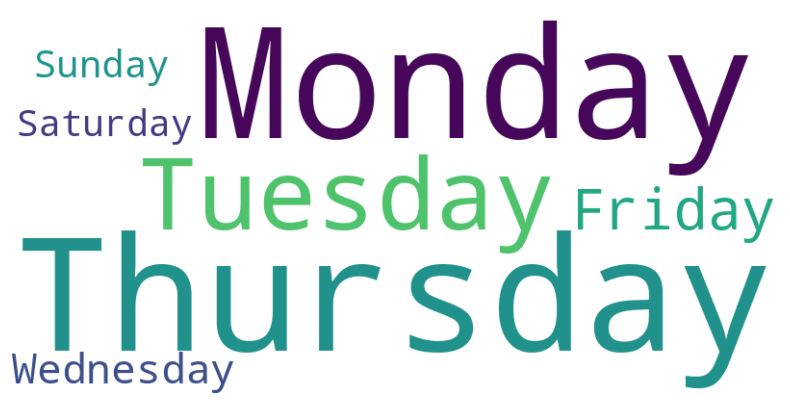

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('output_file_with_day_names.csv')

# Assuming your CSV file has a column named 'conversations' with text data
text_data = ' '.join(df['day_name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
day_name_counts = df['day_name'].value_counts()

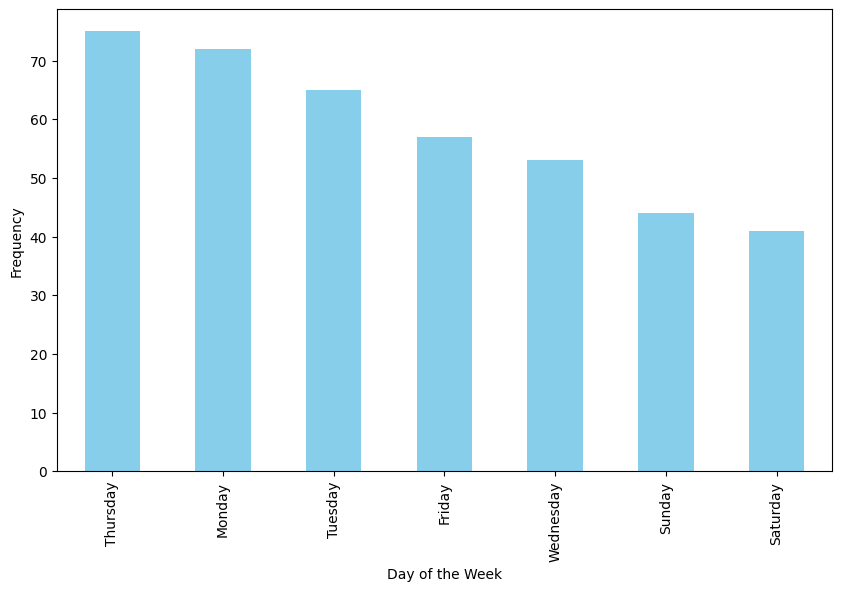

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
day_name_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

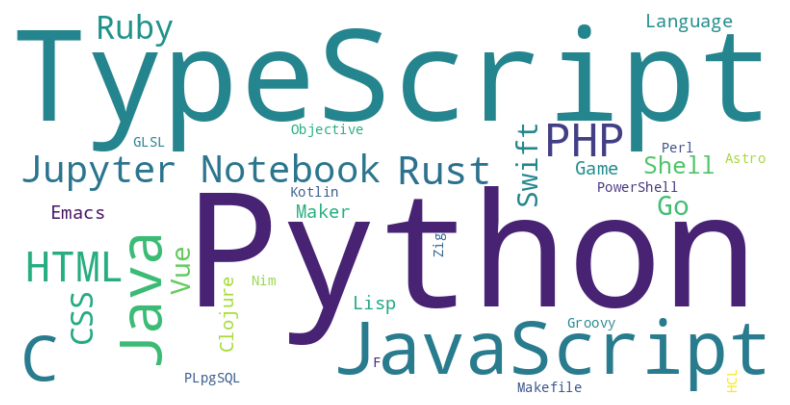

In [ ]:
text_data = ' '.join(df['CodingLanguage'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
day_name_counts = df['CodingLanguage'].value_counts()

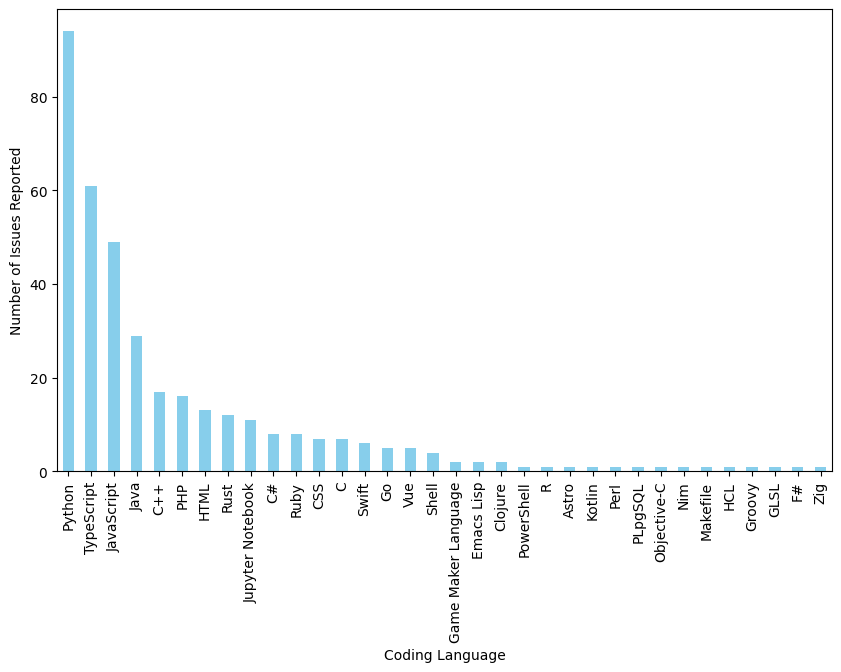

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
day_name_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Coding Language')
plt.ylabel('Number of Issues Reported')
plt.show()